# EDA for Swimming Olympics Dataset

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Initial Statistics

In [33]:
swim_df = pd.read_csv('../data/processed/swimming/swimming_results.csv')

In [34]:
swim_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3258 entries, 0 to 3257
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Athlete   3258 non-null   object
 1   Country   3258 non-null   object
 2   NOC       3258 non-null   object
 3   Season    3258 non-null   object
 4   Year      3258 non-null   int64 
 5   City      3258 non-null   object
 6   Sport     3258 non-null   object
 7   Event     3258 non-null   object
 8   Medal     3258 non-null   object
 9   Category  3258 non-null   object
dtypes: int64(1), object(9)
memory usage: 254.7+ KB


In [35]:
print(f"Min Date: {swim_df['Year'].min()}")
print(f"Max Date: {swim_df['Year'].max()}")


Min Date: 1896
Max Date: 2024


In [36]:
# view the categorical columns summary statistics
swim_df[swim_df.dtypes[swim_df.dtypes == 'object'].index].describe()

,Athlete,Country,NOC,Season,City,Sport,Event,Medal,Category
count,3258,3258,3258,3258,3258,3258,3258,3258,3258
unique,1756,62,57,1,23,1,57,3,3
top,"Michael Fred Phelps, Ii",United States,USA,Summer,London,Swimming,4X100M Freestyle Relay,Gold,Men
freq,28,1124,1136,3258,278,3258,571,1169,1776


### Dataframe Statistics Summary

The data looks as expected.
- There are only three values for Medal (Gold, Silver, Bronze)
- There are only three values for Category (Men, Women, Mixed)
- There is only one Sport (Swimming)
- The  Athlete, Country, and Event count cannot be verified right now, but can be explored more.

## Analyze the Last 50 Years of Olympic Swimming

In [37]:
# filter by the year
recent_swim_df = swim_df[swim_df['Year'] >= 1974]

recent_swim_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2099 entries, 0 to 3257
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Athlete   2099 non-null   object
 1   Country   2099 non-null   object
 2   NOC       2099 non-null   object
 3   Season    2099 non-null   object
 4   Year      2099 non-null   int64 
 5   City      2099 non-null   object
 6   Sport     2099 non-null   object
 7   Event     2099 non-null   object
 8   Medal     2099 non-null   object
 9   Category  2099 non-null   object
dtypes: int64(1), object(9)
memory usage: 180.4+ KB


### View percentage by Country

In [38]:
# groupby country and count the number of medals
country_medals = recent_swim_df.groupby('Country').size().reset_index(name='Medals')
country_medals = country_medals.sort_values(by='Medals', ascending=False)
country_medals.head(10)

,Country,Medals
48,United States,675
1,Australia,302
13,East Germany,115
16,Germany,93
7,Canada,89
8,China,88
26,Netherlands,75
38,Soviet Union,75
17,Great Britain,62
15,France,62


In [39]:
recent_swim_df = recent_swim_df.copy()

# replace East Germany with Germany
recent_swim_df.loc[recent_swim_df['Country'] == 'East Germany', 'Country'] = 'Germany'
# replace Soviet Union with Russia
recent_swim_df.loc[recent_swim_df['Country'] == 'Soviet Union', 'Country'] = 'Russia'

# groupby country and count the number of medals
country_medals = recent_swim_df.groupby('Country').size().reset_index(name='Medals')
country_medals = country_medals.sort_values(by='Medals', ascending=False)
country_medals.head(10) 


,Country,Medals
46,United States,675
1,Australia,302
15,Germany,208
30,Russia,123
7,Canada,89
8,China,88
25,Netherlands,75
14,France,62
16,Great Britain,62
22,Japan,59


In [40]:
# get the top 10 countries
top_10_countries = country_medals.head(10)['Country'].values
top_10_countries

array(['United States', 'Australia', 'Germany', 'Russia', 'Canada',
       'China', 'Netherlands', 'France', 'Great Britain', 'Japan'],
      dtype=object)

In [41]:
# group by year and country to get the number of medals
year_country_medals = recent_swim_df[recent_swim_df['Country'].isin(top_10_countries)].groupby(['Year', 'Country']).size().reset_index(name='Medals')
year_country_medals.head()

,Year,Country,Medals
0,1976,Australia,1
1,1976,Canada,20
2,1976,Germany,28
3,1976,Great Britain,6
4,1976,Netherlands,2


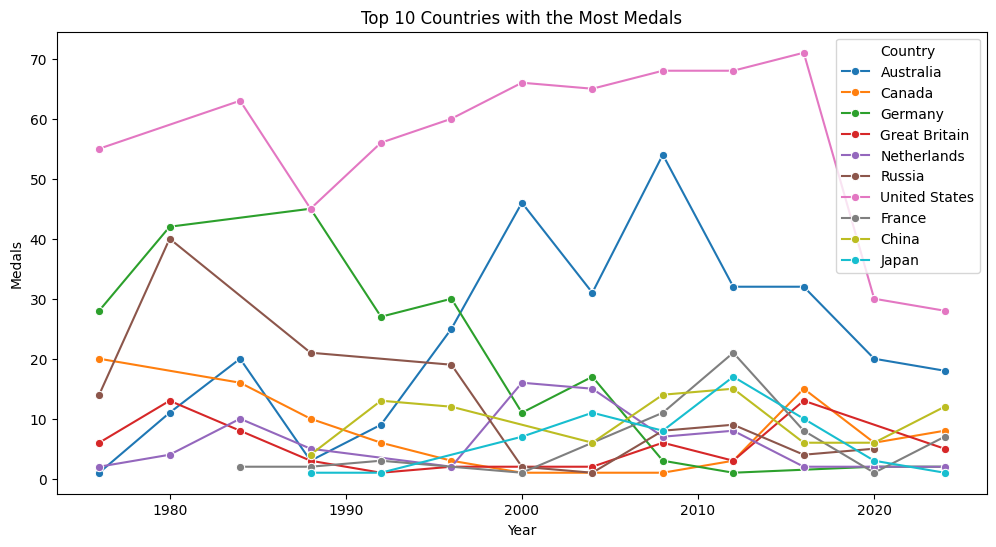

In [42]:
# plot the top 10 countries with the most medals over the years
plt.figure(figsize=(12, 6))
sns.lineplot(y='Medals', x='Year', data=year_country_medals, hue='Country', marker='o')
plt.title('Top 10 Countries with the Most Medals')
plt.show()

### Create a Metric for the Percentage of Medals

In [43]:
# combine the category and event columns to get all the events by gender
recent_swim_df['Cat_Event'] = recent_swim_df['Category'] + ' ' + recent_swim_df['Event']

# calculate the number of potential medals based on the number of events
n_events_df = recent_swim_df.groupby('Year')['Cat_Event'].nunique().reset_index(name='Events_Count')
n_events_df.describe()

,Year,Events_Count
count,13.000000,13.000000
mean,2000.000000,31.615385
std,15.577762,3.042435
min,1976.000000,26.000000
25%,1988.000000,31.000000
50%,2000.000000,32.000000
75%,2012.000000,34.000000
max,2024.000000,35.000000


In [44]:
n_events_df

,Year,Events_Count
0,1976,26
1,1980,26
2,1984,29
3,1988,31
4,1992,31
5,1996,32
6,2000,32
7,2004,32
8,2008,34
9,2012,34


There are 9 more events for swimming in the recent Olympics compared to the 1976 Olympics.

What are the new events? Perform sanity check!!

In [45]:
# create a list of events from 1976
events_1976 = recent_swim_df[recent_swim_df['Year'] == 1976]['Cat_Event'].unique()

# view the events in 2024 that were not in 1976
events_2024 = recent_swim_df[recent_swim_df['Year'] == 2024]['Cat_Event'].unique()
new_events = [event for event in events_2024 if event not in events_1976]

print("The events in 2024 that were not in 1976 are:")
new_events

The events in 2024 that were not in 1976 are:


['Women 50M Freestyle',
 'Mixed  4X100M Medley Relay',
 'Women 200M Individual Medley',
 'Men 200M Individual Medley',
 'Men 50M Freestyle',
 'Women 4X200M Freestyle Relay',
 'Women 1500M Freestyle',
 'Men 800M Freestyle',
 'Men 4X100M Freestyle Relay']

Doing a search of the Olympics website for the results from 1976, it can be confirmed that these events were not in the 1976 Olympics.

In [46]:
# create a number of potential medals column
n_events_df['Potential_Medals'] = n_events_df['Events_Count'] * 3
n_events_df

,Year,Events_Count,Potential_Medals
0,1976,26,78
1,1980,26,78
2,1984,29,87
3,1988,31,93
4,1992,31,93
5,1996,32,96
6,2000,32,96
7,2004,32,96
8,2008,34,102
9,2012,34,102


There are 27 more potential medals in 2024 than in 1976!!!

In [47]:
# join the number of potential medals to the year_country_medals dataframe
year_country_medals = year_country_medals.join(n_events_df.set_index('Year'), on='Year')

# calculate the percentage of medals won
year_country_medals['Pct_Medals'] = year_country_medals['Medals'] / year_country_medals['Potential_Medals'] * 100
year_country_medals['Pct_Medals'] = year_country_medals['Pct_Medals'].round(2)

In [57]:
year_country_medals.head()

,Year,Country,Medals,Events_Count,Potential_Medals,Pct_Medals
0,1976,Australia,1,26,78,1.28
1,1976,Canada,20,26,78,25.64
2,1976,Germany,28,26,78,35.90
3,1976,Great Britain,6,26,78,7.69
4,1976,Netherlands,2,26,78,2.56


In [61]:
# assert the that grouped percentage of medals won is less than or equal to 100
year_country_medals.groupby('Year')['Pct_Medals'].sum()

Year
1976    161.53
1980    141.03
1984    136.78
1988    149.48
1992    124.75
1996    159.36
2000    156.25
2004    160.41
2008    176.46
2012    173.53
2016    157.84
2020     71.41
2024     79.04
Name: Pct_Medals, dtype: float64

## The % should not be more than 100%. Check on 1976

### It is because the relays need to broken down by team not individual 

## Turn all the Relay Data into Country for the Athlete column

In [72]:
relay_df = recent_swim_df[recent_swim_df['Event'].str.contains('Relay')]
relay_df.groupby(['Year', 'Category'])['Event'].nunique()

Year  Category
1976  Men         2
      Women       2
1980  Men         2
      Women       2
1984  Men         3
      Women       2
1988  Men         3
      Women       2
1992  Men         3
      Women       2
1996  Men         3
      Women       3
2000  Men         3
      Women       3
2004  Men         3
      Women       3
2008  Men         3
      Women       3
2012  Men         3
      Women       3
2016  Men         3
      Women       3
2020  Men         3
      Mixed       1
      Women       3
2024  Men         3
      Mixed       1
      Women       3
Name: Event, dtype: int64

In [77]:
# groupby year, category, medal, country and count the number of medals
relay_medals = relay_df.groupby(['Year', 'Category', 'Medal', 'Country', 'Event']).size().reset_index(name='Medals')
relay_medals.head()

,Year,Category,Medal,Country,Event,Medals
0,1976,Men,Bronze,Great Britain,4X200M Freestyle Relay,4
1,1976,Men,Bronze,West Germany,4X100M Medley Relay,6
2,1976,Men,Gold,United States,4X100M Medley Relay,8
3,1976,Men,Gold,United States,4X200M Freestyle Relay,6
4,1976,Men,Silver,Canada,4X100M Medley Relay,5


In [81]:
relay_medals.groupby(['Year', 'Category'])['Event'].nunique().reset_index(name='Events_Count')

,Year,Category,Events_Count
0,1976,Men,2
1,1976,Women,2
2,1980,Men,2
3,1980,Women,2
4,1984,Men,3
5,1984,Women,2
6,1988,Men,3
7,1988,Women,2
8,1992,Men,3
9,1992,Women,2


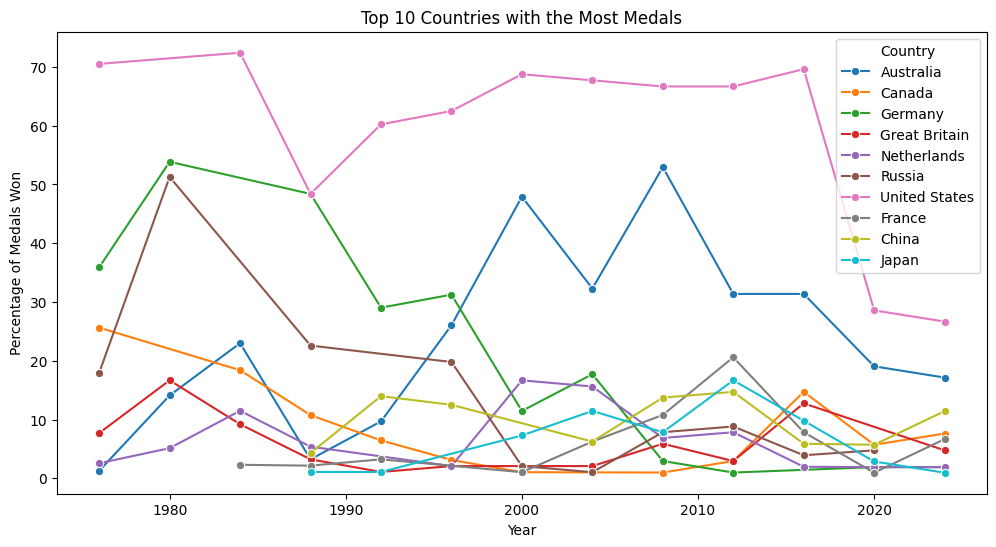

In [60]:
pct_top_ten_df = year_country_medals[year_country_medals['Country'].isin(top_10_countries)]

# plot the top 10 countries with the most medals over the years
plt.figure(figsize=(12, 6))
sns.lineplot(y='Pct_Medals', x='Year', data=pct_top_ten_df, hue='Country', marker='o')
plt.title('Top 10 Countries with the Most Medals')
plt.xlabel('Year')
plt.ylabel('Percentage of Medals Won')
plt.show()

### View Results by Gender

In [49]:
recent_swim_df['Category'].value_counts()

Men      1073
Women    1020
Mixed       6
Name: Category, dtype: int64

In [50]:
# split the df by gender
men_swim_df = recent_swim_df[recent_swim_df['Category'] == 'Men']
women_swim_df = recent_swim_df[recent_swim_df['Category'] == 'Women']

In [51]:
def top_ten_countries(df):
    # groupby country and count the number of medals
    country_medals = df.groupby('Country').size().reset_index(name='Medals')
    country_medals = country_medals.sort_values(by='Medals', ascending=False)
    # get the top 10 countries
    top_10_countries = country_medals.head(10)['Country'].values
    top_10_df = df[df['Country'].isin(top_10_countries)]
    year_country_medals = top_10_df.groupby(['Year', 'Country']).size().reset_index(name='Medals')
    
    return year_country_medals   

In [52]:
men_top_ten_df = top_ten_countries(men_swim_df)
men_top_ten_df.head()

,Year,Country,Medals
0,1976,Australia,1
1,1976,Canada,5
2,1976,Germany,1
3,1976,Great Britain,6
4,1976,Russia,9


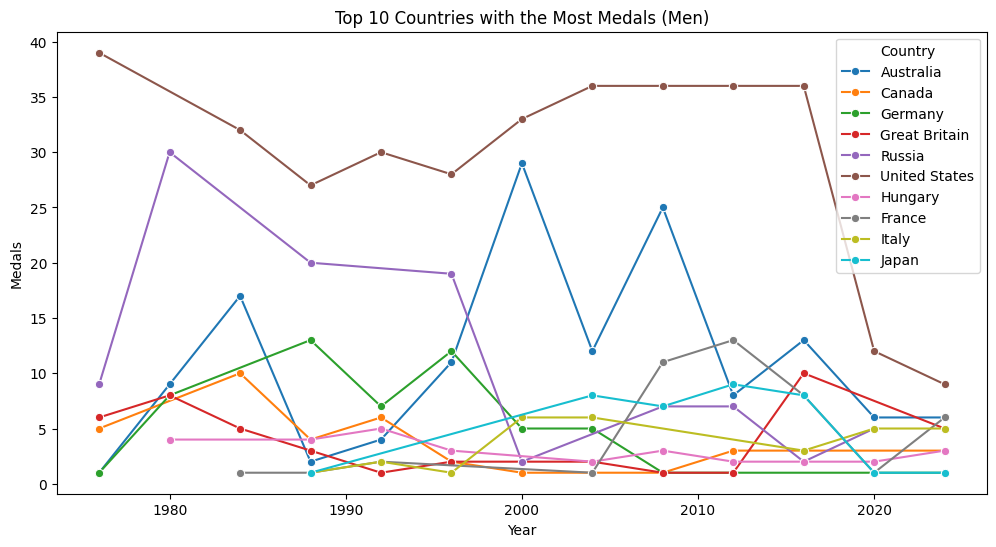

In [53]:
# plot the top 10 countries with the most medals over the years
plt.figure(figsize=(12, 6))
sns.lineplot(y='Medals', x='Year', data=men_top_ten_df, hue='Country', marker='o')
plt.title('Top 10 Countries with the Most Medals (Men)')
plt.show()

In [54]:
men_top_ten_df[men_top_ten_df['Country'] == 'Japan']

,Year,Country,Medals
23,1988,Japan,1
54,2004,Japan,8
62,2008,Japan,7
71,2012,Japan,9
79,2016,Japan,8
87,2020,Japan,1
97,2024,Japan,1


In [55]:
women_top_ten_df = top_ten_countries(women_swim_df)
women_top_ten_df.head()

,Year,Country,Medals
0,1976,Canada,15
1,1976,Germany,27
2,1976,Netherlands,2
3,1976,Russia,5
4,1976,United States,16


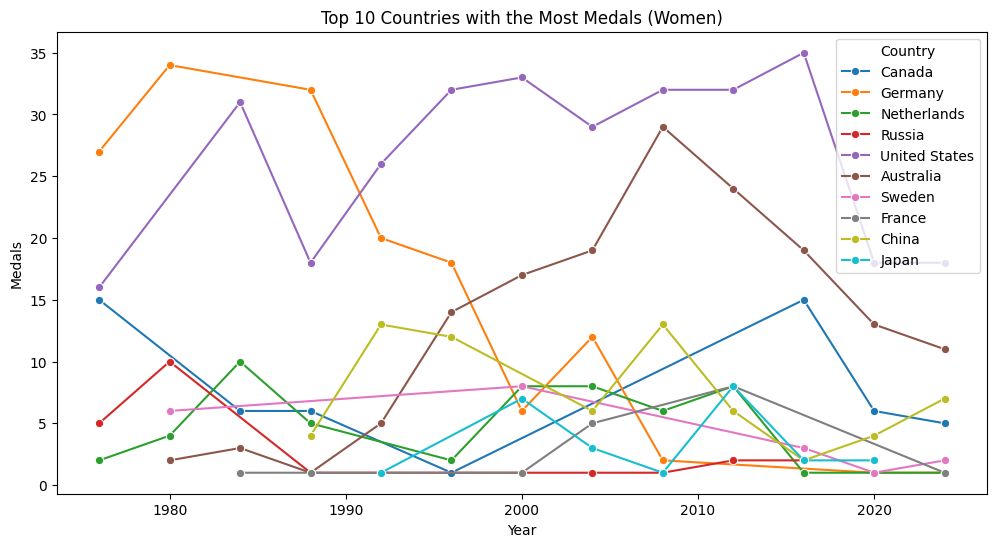

In [56]:
# plot the top 10 countries with the most medals over the years
plt.figure(figsize=(12, 6))
sns.lineplot(y='Medals', x='Year', data=women_top_ten_df, hue='Country', marker='o')
plt.title('Top 10 Countries with the Most Medals (Women)')
plt.show()